Part 1 of the project (:

In [4]:
#Loading the dataset and turning it into a DataFrame
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

housing_data = fetch_california_housing(as_frame=True)
df=housing_data.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


We can notice that dataset have 20640 rows and 9 columnts
realisticly the target feture should be MedHouseVal where we use the rest to pridict it 

In [6]:
#Splitting the data 
from sklearn.model_selection import train_test_split
x=df.drop('MedHouseVal',axis=1)
y=df['MedHouseVal']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"\nTrain size: {x_train.shape[0]}, Test size: {x_test.shape[0]}")


Train size: 16512, Test size: 4128


Part 2 

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#All of the metricss required in one fundtion for easy call
def eval_metrics(true,pred):
    rmse = np.sqrt(mean_squared_error(true,pred))
    mae = mean_absolute_error(true,pred)
    r2 = r2_score(true,pred)
    return rmse,mae,r2

In [8]:
#Definign all of the models 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

models = {
    'Linear': make_pipeline(StandardScaler(), LinearRegression()),
    'Ridge': make_pipeline(StandardScaler(), Ridge(random_state=42)),
    'Lasso': make_pipeline(StandardScaler(), Lasso(max_iter=10000, random_state=42))
}
results = []

In [9]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse, mae, r2 = eval_metrics(y_test, y_pred)
    results.append({'Model': name, 'Poly': False, 'RMSE': rmse, 'MAE': mae, 'R2': r2})
    print(f"{name} (no poly) -> RMSE: {rmse:.3f}, MAE: {mae:.3f}, R2: {r2:.3f}")


Linear (no poly) -> RMSE: 0.746, MAE: 0.533, R2: 0.576
Ridge (no poly) -> RMSE: 0.746, MAE: 0.533, R2: 0.576
Lasso (no poly) -> RMSE: 1.145, MAE: 0.906, R2: -0.000


We can notice that Riddge without any tunning is pretty much identical to the base liner regression model as for the lasso model it's much worse noticing almost having a 1 for RMSE and a very low R^2 value of around 28% only compared to over 58% on the other models .

In [10]:
#Adding polynomial features for all models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
poly_cols = ['MedInc', 'HouseAge']
poly_transformer = ColumnTransformer(transformers=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False), poly_cols)
], remainder='passthrough')

models_poly = {
    'Linear (Poly MedInc+HouseAge)': Pipeline([
        ('poly', poly_transformer),
        ('scaler', StandardScaler()),
        ('lr', LinearRegression())
    ]),
    'Ridge (Poly MedInc+HouseAge)': Pipeline([
        ('poly', poly_transformer),
        ('scaler', StandardScaler()),
        ('ridge', Ridge(random_state=42))
    ]),
    'Lasso (Poly MedInc+HouseAge)': Pipeline([
        ('poly', poly_transformer),
        ('scaler', StandardScaler()),
        ('lasso', Lasso(max_iter=20000, random_state=42))
    ])
}
results_2 =[]
for name, model in models_poly.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse, mae, r2 = eval_metrics(y_test, y_pred)
    results_2.append({'Model': name, 'Poly': True, 'RMSE': rmse, 'MAE': mae, 'R2': r2})
    print(f"{name} -> RMSE: {rmse:.3f}, MAE: {mae:.3f}, R2: {r2:.3f}")


results_df2 = pd.DataFrame(results_2).sort_values(['Poly', 'RMSE'])
results_df = pd.DataFrame(results).sort_values(['Poly', 'RMSE'])
results_df = results_df.reset_index(drop=True) # Just so I don't go crazy beacuse 0 is before 1 my man
results_df2 = results_df2.reset_index(drop=True)
print("\nSummary results 1:\n", results_df)
print("\nSummary results 2:\n", results_df2)


Linear (Poly MedInc+HouseAge) -> RMSE: 0.741, MAE: 0.530, R2: 0.581
Ridge (Poly MedInc+HouseAge) -> RMSE: 0.741, MAE: 0.530, R2: 0.581
Lasso (Poly MedInc+HouseAge) -> RMSE: 1.145, MAE: 0.906, R2: -0.000

Summary results 1:
     Model   Poly      RMSE       MAE        R2
0   Ridge  False  0.745557  0.533193  0.575816
1  Linear  False  0.745581  0.533200  0.575788
2   Lasso  False  1.144856  0.906069 -0.000219

Summary results 2:
                            Model  Poly      RMSE       MAE        R2
0   Ridge (Poly MedInc+HouseAge)  True  0.741295  0.529563  0.580651
1  Linear (Poly MedInc+HouseAge)  True  0.741336  0.529584  0.580605
2   Lasso (Poly MedInc+HouseAge)  True  1.144856  0.906069 -0.000219


By checking the models we can easily determin that the ridge model has the best result of R^2 value of around 58% with a very small imporovment after the poly usage of around 0.01%
For linear models we can inspect coefficients. We'll print coefficients for Ridge Since it's the best model

In [11]:
ridge_poly = models_poly['Ridge (Poly MedInc+HouseAge)']

# Get feature names 
feature_names = ridge_poly.named_steps['poly'].get_feature_names_out(input_features=x_train.columns)

# Get coefficients 
coefficients = ridge_poly.named_steps['ridge'].coef_

# Put into DataFrame 
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'AbsCoefficient': np.abs(coefficients)
}).sort_values('AbsCoefficient', ascending=False).reset_index(drop=True)


print("\nTop 10 strongest features in Ridge (Poly):\n")
print(coef_df.head(10))



Top 10 strongest features in Ridge (Poly):

                 Feature  Coefficient  AbsCoefficient
0           poly__MedInc     1.011988        1.011988
1    remainder__Latitude    -0.863290        0.863290
2   remainder__Longitude    -0.834034        0.834034
3   remainder__AveBedrms     0.375616        0.375616
4    remainder__AveRooms    -0.338219        0.338219
5         poly__MedInc^2    -0.274871        0.274871
6       poly__HouseAge^2     0.219951        0.219951
7         poly__HouseAge    -0.190636        0.190636
8  poly__MedInc HouseAge     0.161355        0.161355
9    remainder__AveOccup    -0.041181        0.041181


We can notice that the " poly__MedInc " is the most effective and important feture where the higher it is the higher the value of the house is .
Please not that all the other fetrues except the house age did not actually have anything happen to them since in the code I made sure to use the value remainder='passthrough' for the rest of the fetures .

#Part 3

In [12]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

#Compute median from training set only (no leakage)
medhouse_median = train_df['MedHouseVal'].median()

#Creaating the lablels 
train_df['Expensive'] = (train_df['MedHouseVal'] > medhouse_median).astype(int)
test_df['Expensive']  = (test_df['MedHouseVal']  > medhouse_median).astype(int)


print("Training label counts:\n", train_df['Expensive'].value_counts())
print("\nTest label counts:\n", test_df['Expensive'].value_counts())
print(f"\nTrain shape: {train_df.shape}, Test shape: {test_df.shape}")

#drop the original target and the new label from features
X_train_clf = train_df.drop(columns=['MedHouseVal', 'Expensive'])
y_train_clf = train_df['Expensive']
X_test_clf  = test_df.drop(columns=['MedHouseVal', 'Expensive'])
y_test_clf  = test_df['Expensive']

print(f"\nX_train_clf shape: {X_train_clf.shape}, y_train_clf shape: {y_train_clf.shape}")


Training label counts:
 Expensive
0    8256
1    8256
Name: count, dtype: int64

Test label counts:
 Expensive
0    2078
1    2050
Name: count, dtype: int64

Train shape: (16512, 10), Test shape: (4128, 10)

X_train_clf shape: (16512, 8), y_train_clf shape: (16512,)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

log_reg = LogisticRegression(max_iter=10000, random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)

models_clf = {
    "Logistic Regression": log_reg,
    "Decision Tree": tree_clf
}

for name, model in models_clf.items():
    model.fit(X_train_clf, y_train_clf)              
    y_pred = model.predict(X_test_clf)              
    
    acc = accuracy_score(y_test_clf, y_pred)
    prec = precision_score(y_test_clf, y_pred)
    rec = recall_score(y_test_clf, y_pred)
    f1 = f1_score(y_test_clf, y_pred)
    cm = confusion_matrix(y_test_clf, y_pred)

    print(f"\n{name} Results:")
    print(f"Accuracy:  {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall:    {rec:.3f}")
    print(f"F1 Score:  {f1:.3f}")
    print("Confusion Matrix:")
    print(cm)
    print("========================")
# I can be stupid so just so my ass won't forget lol

# True Affordable correctly predicted (top-left).

# Affordable predicted as Expensive (top-right → false positive).

# Expensive predicted as Affordable (bottom-left → false negative).

# True Expensive correctly predicted (bottom-right).


Logistic Regression Results:
Accuracy:  0.827
Precision: 0.826
Recall:    0.824
F1 Score:  0.825
Confusion Matrix:
[[1723  355]
 [ 361 1689]]

Decision Tree Results:
Accuracy:  0.844
Precision: 0.838
Recall:    0.849
F1 Score:  0.844
Confusion Matrix:
[[1742  336]
 [ 309 1741]]


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Compute quartile boundaries from TRAIN only (no leakage)
q1, q2, q3 = train_df['MedHouseVal'].quantile([0.25, 0.50, 0.75]).values
bins = [-np.inf, q1, q2, q3, np.inf]            #4 intervals smart one yes da (:

#Create quartile labels 
train_df['ValueQuartile'] = pd.cut(train_df['MedHouseVal'], bins=bins, labels=[0,1,2,3]).astype(int)
test_df['ValueQuartile']  = pd.cut(test_df['MedHouseVal'],  bins=bins, labels=[0,1,2,3]).astype(int)


print("Train quartile counts:\n", train_df['ValueQuartile'].value_counts().sort_index())
print("\nTest quartile counts:\n", test_df['ValueQuartile'].value_counts().sort_index())

#drop MedHouseVal and previous binary label if present
X_train_mc = train_df.drop(columns=['MedHouseVal','Expensive','ValueQuartile'], errors='ignore')
y_train_mc = train_df['ValueQuartile']
X_test_mc  = test_df.drop(columns=['MedHouseVal','Expensive','ValueQuartile'], errors='ignore')
y_test_mc  = test_df['ValueQuartile']

#Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_mc, y_train_mc)
y_pred_mc = rf.predict(X_test_mc)

#Results
print("\nRandom Forest (multiclass) Results:")
print(f"Accuracy: {accuracy_score(y_test_mc, y_pred_mc):.3f}")
print("\nClassification report (per class):")
print(classification_report(y_test_mc, y_pred_mc, target_names=['Q1','Q2','Q3','Q4']))
print("Confusion Matrix (rows=true classes, cols=predicted classes):")
print(confusion_matrix(y_test_mc, y_pred_mc))

#F it just to simplfy stuff remember that :
# Rows = actual labels (the true quartile the house belongs to).

# Columns = predicted labels (what the model guessed).

# Each number = how many houses fell into that situation.


Train quartile counts:
 ValueQuartile
0    4133
1    4123
2    4128
3    4128
Name: count, dtype: int64

Test quartile counts:
 ValueQuartile
0    1039
1    1039
2    1034
3    1016
Name: count, dtype: int64

Random Forest (multiclass) Results:
Accuracy: 0.751

Classification report (per class):
              precision    recall  f1-score   support

          Q1       0.82      0.86      0.84      1039
          Q2       0.67      0.66      0.67      1039
          Q3       0.67      0.69      0.68      1034
          Q4       0.84      0.81      0.82      1016

    accuracy                           0.75      4128
   macro avg       0.75      0.75      0.75      4128
weighted avg       0.75      0.75      0.75      4128

Confusion Matrix (rows=true classes, cols=predicted classes):
[[892 128  15   4]
 [167 681 169  22]
 [ 19 170 711 134]
 [  6  30 162 818]]


A.Binary (Affordable vs Expensive)

1.Easier task → higher accuracy.

2.Good for a simple “cheap vs expensive” split.

B.Multi-class (Quartiles Q0–Q3)

1.Harder task → lower accuracy.

2.Gives more detail (cheap, mid, expensive).

3.Middle groups (Q1, Q2) often get confused.

In [30]:
#Standardizing features and reducing to 2D with PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

feature_cols = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']

x = df[feature_cols].copy()

#Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

#PCA to 2 components (PC1, PC2)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

#Show how much variance these 2 components explain
print(f"Explained variance ratio: PC1 = {pca.explained_variance_ratio_[0]:.3f}, "
      f"PC2 = {pca.explained_variance_ratio_[1]:.3f}, "
      f"Total = {pca.explained_variance_ratio_.sum():.3f}")


pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2'])
pca_df.index = df.index


#Scatter plot not required just for me lol
# plt.figure(figsize=(7,5))
# plt.scatter(pca_df['PC1'], pca_df['PC2'], s=10)
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.title('PCA projection (2 components)')
# plt.grid(True)
# plt.show()


Explained variance ratio: PC1 = 0.253, PC2 = 0.235, Total = 0.489


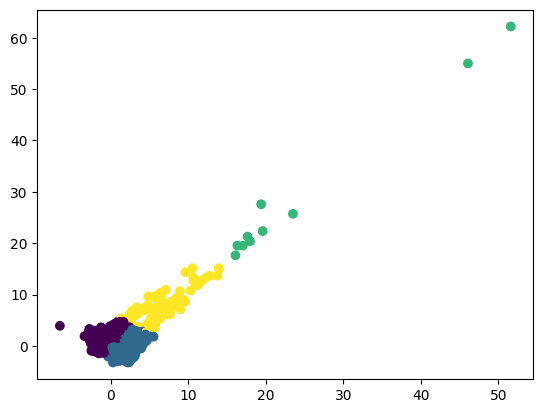

In [32]:
from sklearn.cluster import KMeans

#print(pca_df['PC1'])

kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_df)

plt.scatter(pca_df["PC1"],pca_df["PC2"],c=kmeans.labels_)
plt.show()


In [35]:
from sklearn.metrics import silhouette_score
results_4=[]
k_values = [3,4,5]
k_models = {}
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    inertia = kmeans.inertia_
    sil = silhouette_score(X_pca, labels)
    results_4.append({'k': k, 'inertia': float(inertia), 'silhouette': float(sil)})
    k_models[k] = {'kmeans': kmeans, 'labels': labels}

res_df = pd.DataFrame(results_4)
print("\nKMeans evaluation (PCA space) for k=3,4,5:\n", res_df)


KMeans evaluation (PCA space) for k=3,4,5:
    k       inertia  silhouette
0  3  28613.558819    0.600484
1  4  20726.546824    0.602561
2  5  16588.561661    0.476819


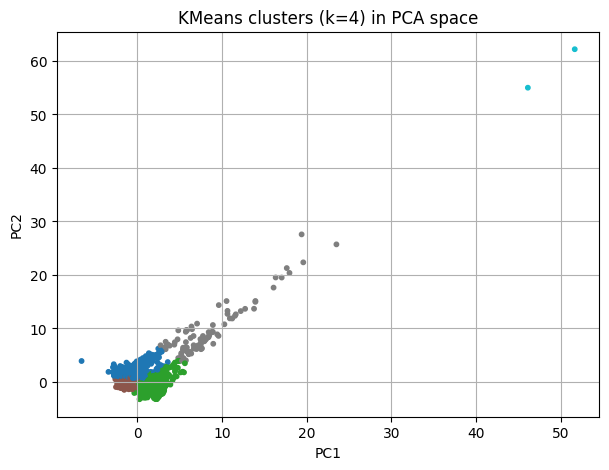

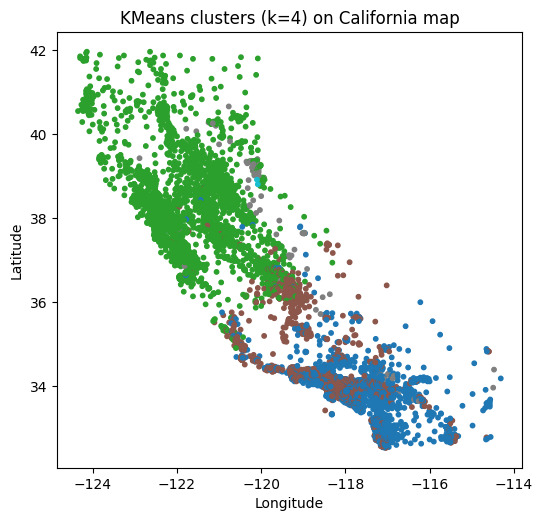

In [34]:
labels = kmeans.labels_

# --- 1. PCA space plot ---
plt.figure(figsize=(7,5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=labels, s=10, cmap='tab10')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans clusters (k=4) in PCA space")
plt.grid(True)
plt.show()

# --- 2. Geographic map plot ---
plt.figure(figsize=(6,7))
plt.scatter(df['Longitude'], df['Latitude'], c=labels, s=10, cmap='tab10')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("KMeans clusters (k=4) on California map")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In PCA space, the clusters are not clearly separated, suggesting overlapping housing characteristics. However, when plotted on the California map, the clusters align more meaningfully with geography. For example, one cluster covers southern coastal regions (Los Angeles/San Diego), another covers the San Francisco Bay and northern coastal areas, while another covers the inland Central Valley. This indicates that geographic location strongly influences housing characteristics and values, and clustering partially reflects real-world regional divisions.